In [2]:
import os
import shutil
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from allensdk.brain_observatory.ecephys.ecephys_project_cache import EcephysProjectCache

data_directory = 'H:\\allenSDKdata' # must be updated to a valid directory in your filesystem

manifest_path = os.path.join(data_directory, "manifest.json")

cache = EcephysProjectCache.from_warehouse(manifest=manifest_path, timeout=9999999999999999)

sessions = cache.get_session_table()
print('Total number of sessions: ' + str(len(sessions)))
sessions.head()

Total number of sessions: 58


,published_at,specimen_id,session_type,age_in_days,sex,full_genotype,unit_count,channel_count,probe_count,ecephys_structure_acronyms
id,,,,,,,,,,
715093703,2019-10-03T00:00:00Z,699733581,brain_observatory_1.1,118.0,M,Sst-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,884,2219,6,"[CA1, VISrl, nan, PO, LP, LGd, CA3, DG, VISl, ..."
719161530,2019-10-03T00:00:00Z,703279284,brain_observatory_1.1,122.0,M,Sst-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,755,2214,6,"[TH, Eth, APN, POL, LP, DG, CA1, VISpm, nan, N..."
721123822,2019-10-03T00:00:00Z,707296982,brain_observatory_1.1,125.0,M,Pvalb-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,444,2229,6,"[MB, SCig, PPT, NOT, DG, CA1, VISam, nan, LP, ..."
732592105,2019-10-03T00:00:00Z,717038288,brain_observatory_1.1,100.0,M,wt/wt,824,1847,5,"[grey, VISpm, nan, VISp, VISl, VISal, VISrl]"
737581020,2019-10-03T00:00:00Z,718643567,brain_observatory_1.1,108.0,M,wt/wt,568,2218,6,"[grey, VISmma, nan, VISpm, VISp, VISl, VISrl]"


In [3]:
channels = cache.get_channels()
print('Total number of channels: ' + str(len(channels)))
channels.head()

Total number of channels: 123224


,ecephys_probe_id,local_index,probe_horizontal_position,probe_vertical_position,anterior_posterior_ccf_coordinate,dorsal_ventral_ccf_coordinate,left_right_ccf_coordinate,ecephys_structure_id,ecephys_structure_acronym,ecephys_session_id,lfp_sampling_rate,phase,sampling_rate,has_lfp_data,unit_count
id,,,,,,,,,,,,,,,
849705558,792645504,1,11,20,8165.0,3314.0,6862.0,215.0,APN,779839471,1250.001479,3a,30000.035489,True,0
849705560,792645504,2,59,40,8162.0,3307.0,6866.0,215.0,APN,779839471,1250.001479,3a,30000.035489,True,0
849705562,792645504,3,27,40,8160.0,3301.0,6871.0,215.0,APN,779839471,1250.001479,3a,30000.035489,True,0
849705564,792645504,4,43,60,8157.0,3295.0,6875.0,215.0,APN,779839471,1250.001479,3a,30000.035489,True,0
849705566,792645504,5,11,60,8155.0,3288.0,6879.0,215.0,APN,779839471,1250.001479,3a,30000.035489,True,0


In [4]:
units = cache.get_units()
print('Total number of units: ' + str(len(units)))
units.head()

Total number of units: 40010


,waveform_PT_ratio,waveform_amplitude,amplitude_cutoff,cumulative_drift,d_prime,waveform_duration,ecephys_channel_id,firing_rate,waveform_halfwidth,isi_violations,...,phase,sampling_rate,has_lfp_data,date_of_acquisition,published_at,specimen_id,session_type,age_in_days,sex,genotype
id,,,,,,,,,,,,,,,,,,,,,
915956282,0.611816,164.878740,0.072728,309.71,3.910873,0.535678,850229419,6.519432,0.164824,0.104910,...,3a,29999.915391,True,2019-01-09T00:26:20Z,2019-10-03T00:00:00Z,717038288,brain_observatory_1.1,100.0,M,wt/wt
915956340,0.439372,247.254345,0.000881,160.24,5.519024,0.563149,850229419,9.660554,0.206030,0.006825,...,3a,29999.915391,True,2019-01-09T00:26:20Z,2019-10-03T00:00:00Z,717038288,brain_observatory_1.1,100.0,M,wt/wt
915956345,0.500520,251.275830,0.001703,129.36,3.559911,0.521943,850229419,12.698430,0.192295,0.044936,...,3a,29999.915391,True,2019-01-09T00:26:20Z,2019-10-03T00:00:00Z,717038288,brain_observatory_1.1,100.0,M,wt/wt
915956349,0.424620,177.115380,0.096378,169.29,2.973959,0.508208,850229419,16.192413,0.192295,0.120715,...,3a,29999.915391,True,2019-01-09T00:26:20Z,2019-10-03T00:00:00Z,717038288,brain_observatory_1.1,100.0,M,wt/wt
915956356,0.512847,214.954545,0.054706,263.01,2.936851,0.549414,850229419,2.193113,0.233501,0.430427,...,3a,29999.915391,True,2019-01-09T00:26:20Z,2019-10-03T00:00:00Z,717038288,brain_observatory_1.1,100.0,M,wt/wt


In [5]:
probes = cache.get_probes()
print('Total number of probes: ' + str(len(probes)))
probes.head()

Total number of probes: 332


,ecephys_session_id,lfp_sampling_rate,name,phase,sampling_rate,has_lfp_data,unit_count,channel_count,ecephys_structure_acronyms
id,,,,,,,,,
729445648,719161530,1249.998642,probeA,3a,29999.967418,True,87,374,"[APN, LP, MB, DG, CA1, VISam, nan]"
729445650,719161530,1249.996620,probeB,3a,29999.918880,True,202,368,"[TH, Eth, APN, POL, LP, DG, CA1, VISpm, nan]"
729445652,719161530,1249.999897,probeC,3a,29999.997521,True,207,373,"[APN, NOT, MB, DG, SUB, VISp, nan]"
729445654,719161530,1249.996707,probeD,3a,29999.920963,True,93,358,"[grey, VL, CA3, CA2, CA1, VISl, nan]"
729445656,719161530,1249.999979,probeE,3a,29999.999500,True,138,370,"[PO, VPM, TH, LP, LGd, CA3, DG, CA1, VISal, nan]"


In [6]:
sessions = cache.get_session_table()
print('Total number of sessions: ' + str(len(sessions)))
sessions.head()

Total number of sessions: 58


,published_at,specimen_id,session_type,age_in_days,sex,full_genotype,unit_count,channel_count,probe_count,ecephys_structure_acronyms
id,,,,,,,,,,
715093703,2019-10-03T00:00:00Z,699733581,brain_observatory_1.1,118.0,M,Sst-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,884,2219,6,"[CA1, VISrl, nan, PO, LP, LGd, CA3, DG, VISl, ..."
719161530,2019-10-03T00:00:00Z,703279284,brain_observatory_1.1,122.0,M,Sst-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,755,2214,6,"[TH, Eth, APN, POL, LP, DG, CA1, VISpm, nan, N..."
721123822,2019-10-03T00:00:00Z,707296982,brain_observatory_1.1,125.0,M,Pvalb-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,444,2229,6,"[MB, SCig, PPT, NOT, DG, CA1, VISam, nan, LP, ..."
732592105,2019-10-03T00:00:00Z,717038288,brain_observatory_1.1,100.0,M,wt/wt,824,1847,5,"[grey, VISpm, nan, VISp, VISl, VISal, VISrl]"
737581020,2019-10-03T00:00:00Z,718643567,brain_observatory_1.1,108.0,M,wt/wt,568,2218,6,"[grey, VISmma, nan, VISpm, VISp, VISl, VISrl]"


In [7]:
# filtered_sessions = sessions[(sessions.sex == 'M') & \
#                              (sessions.full_genotype.str.find('Sst') > -1) & \
#                              (sessions.session_type == 'brain_observatory_1.1') & \
#                              (['VISl' in acronyms for acronyms in 
#                                sessions.ecephys_structure_acronyms])]

# filtered_sessions.head()

# units = cache.get_units(amplitude_cutoff_maximum = np.inf,
#                         presence_ratio_minimum = -np.inf,
#                         isi_violations_maximum = np.inf)

# print('Total number of units: ' + str(len(units)))
group_list = []
for id, group in sessions.groupby("specimen_id"):
    group_list.append(group)
group_list.__len__()
sessions.__len__()

58

### First try: Classifier on the parameter of static grating
1. Extract multiple sessions where the `stimulus_name` is `static_grating`
    - Write a function for a single session
    - Check whether different sessions have a similar session of structure 
2. Extract the features
    - the neural activity: spike time in different region, do raster plot
    - 
3. Do correlation (?)
4. Do classification (?)


In [8]:
session_id = 715093703
session = cache.get_session_data(session_id)
units = session.units
presentations = session.get_stimulus_table("static_gratings")
start_time = -0.1
stop_time = 0.25
time_step = 0.001
time_bins = np.arange(start_time, stop_time + time_step, time_step)

def get_spike_count(units_mask, presentations_mask):
    return session.presentationwise_spike_counts(
        bin_edges = time_bins, 
        stimulus_presentation_ids = presentations[presentations_mask].index.values,
        unit_ids = units[units_mask].index.values
    )


In [10]:
histograms_120_VISp = get_spike_count(
    units_mask=(units['ecephys_structure_acronym'] == 'VISp'),
    presentations_mask=(presentations['orientation'] == 120.0)
)
histograms_60_VISp = get_spike_count(
    units_mask=(units['ecephys_structure_acronym'] == 'VISp'),
    presentations_mask=(presentations['orientation'] == 60.0)
)
histograms_30_VISp = get_spike_count(
    units_mask=(units['ecephys_structure_acronym'] == 'VISp'),
    presentations_mask=(presentations['orientation'] == 30.0)
)
histograms_150_VISp = get_spike_count(
    units_mask=(units['ecephys_structure_acronym'] == 'VISp'),
    presentations_mask=(presentations['orientation'] == 150.0)
)
histograms_90_VISp = get_spike_count(
    units_mask=(units['ecephys_structure_acronym'] == 'VISp'),
    presentations_mask=(presentations['orientation'] == 90.0)
)
histograms_0_VISp = get_spike_count(
    units_mask=(units['ecephys_structure_acronym'] == 'VISp'),
    presentations_mask=(presentations['orientation'] == 0.0)
)



C:\Users\bj\miniconda3\envs\allen\lib\site-packages\allensdk\brain_observatory\ecephys\ecephys_session.py:760: UserWarning: You've specified some overlapping time intervals between neighboring rows: [(6, 7), (23, 24), (34, 35), (38, 39), (49, 50), (54, 55), (58, 59), (67, 68), (81, 82), (90, 91), (97, 98), (99, 100), (104, 105), (110, 111), (111, 112), (127, 128), (131, 132), (132, 133), (134, 135), (142, 143), (143, 144), (147, 148), (150, 151), (162, 163), (175, 176), (177, 178), (189, 190), (190, 191), (194, 195), (196, 197), (202, 203), (203, 204), (211, 212), (213, 214), (215, 216), (220, 221), (226, 227), (230, 231), (232, 233), (235, 236), (253, 254), (272, 273), (274, 275), (277, 278), (279, 280), (288, 289), (289, 290), (293, 294), (304, 305), (305, 306), (317, 318), (326, 327), (328, 329), (334, 335), (339, 340), (345, 346), (351, 352), (360, 361), (363, 364), (369, 370), (372, 373), (380, 381), (383, 384), (391, 392), (401, 402), (407, 408), (414, 415), (418, 419), (420, 421

Coordinates:
  * stimulus_presentation_id         (stimulus_presentation_id) int64 49445 ... 70370
  * time_relative_to_stimulus_onset  (time_relative_to_stimulus_onset) float64 -0.0995 ... 0.2495
  * unit_id                          (unit_id) int64 950930145 ... 950933960

Coordinates:
  * stimulus_presentation_id         (stimulus_presentation_id) int64 49445 ... 70370
  * time_relative_to_stimulus_onset  (time_relative_to_stimulus_onset) float64 -0.0995 ... 0.2495
  * unit_id                          (unit_id) int64 950930145 ... 950933960

In [14]:
print(histograms_120_VISp.shape)
print(histograms_60_VISp.shape)
print(histograms_30_VISp.shape)
print(histograms_150_VISp.shape)
print(histograms_90_VISp.shape)
print(histograms_0_VISp.shape)

print(histograms_0_VISp.coords)
np.array_equal(histograms_0_VISp.coords['unit_id'], histograms_30_VISp.coords['unit_id'])

(977, 350, 60)
(959, 350, 60)
(970, 350, 60)
(965, 350, 60)
(970, 350, 60)
(970, 350, 60)
Coordinates:
  * stimulus_presentation_id         (stimulus_presentation_id) int64 49445 ... 70370
  * time_relative_to_stimulus_onset  (time_relative_to_stimulus_onset) float64 -0.0995 ... 0.2495
  * unit_id                          (unit_id) int64 950930145 ... 950933960


True

<AxesSubplot:>

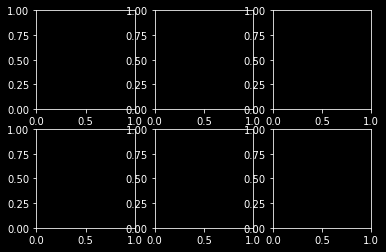

C:\Users\bj\miniconda3\envs\allen\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  import sys


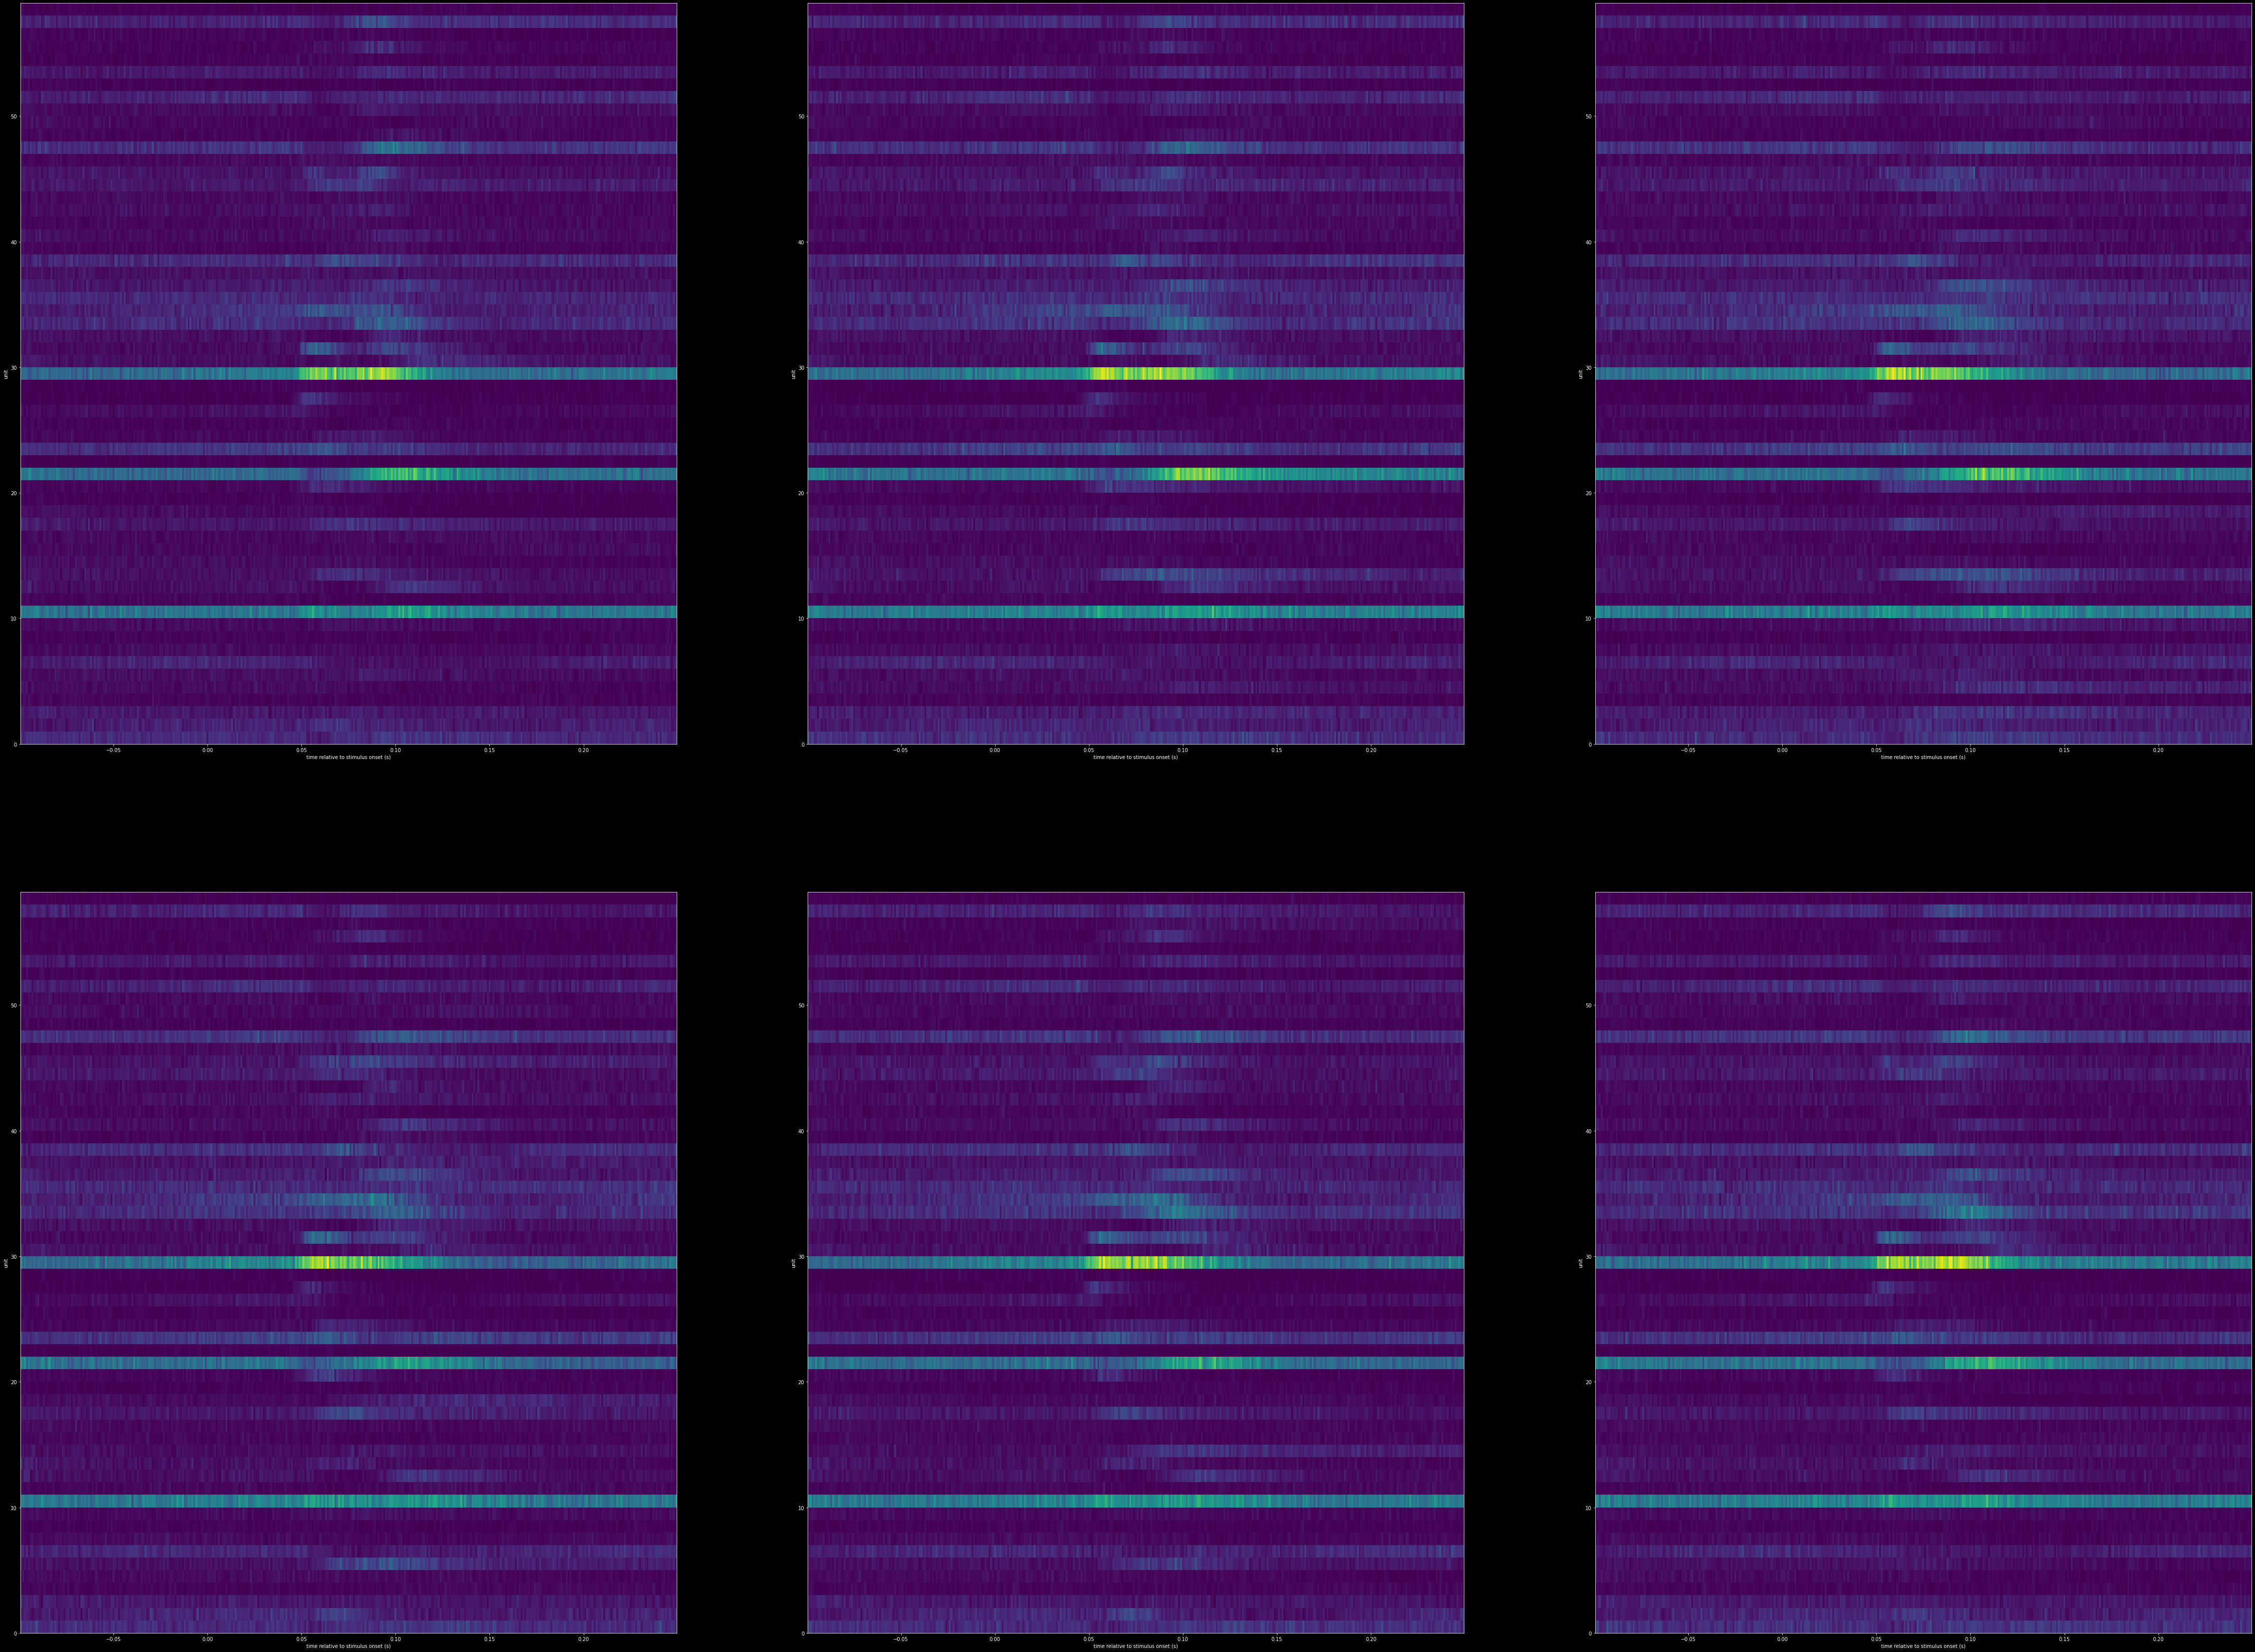

In [81]:

def set_graph(ax, histogram):

    mean_histograms = histogram.mean(dim="stimulus_presentation_id")
    ax.pcolormesh(
        mean_histograms["time_relative_to_stimulus_onset"], 
        np.arange(mean_histograms["unit_id"].size),
        mean_histograms.T
    )
    ax.set_ylabel("unit")
    ax.set_xlabel("time relative to stimulus onset (s)")


fig, ax = plt.subplots(2, 3, )
fig.set_size_inches(80, 60)
set_graph(ax[0][0], histograms_0_VISp)
set_graph(ax[0][1], histograms_30_VISp)
set_graph(ax[0][2], histograms_60_VISp)
set_graph(ax[1][0], histograms_90_VISp)
set_graph(ax[1][1], histograms_120_VISp)
set_graph(ax[1][2], histograms_150_VISp)


plt.show()

In [16]:
# print(session.stimulus_conditions.columns)
# print(session.stimulus_presentations.columns)
# Let's stop hesistating and just try SVM, a linear model

all_histo = [histograms_0_VISp, histograms_30_VISp, histograms_60_VISp, histograms_90_VISp, histograms_120_VISp, histograms_150_VISp]
nsample = sum(histo.shape[0] for histo in all_histo)
nfeature = histograms_0_VISp.shape[1] * histograms_0_VISp.shape[2] # time * unit_id
X_dataset_all = np.empty(shape=(nsample, nfeature))
y_dataset_all = np.empty(shape=(nsample,))
now_idx = 0
now_label = 0 # 0 for 0 degree, 1 for 30, 2 for 60, 3 for 90, 4 for 120, 5 - 150
for histo in all_histo:
    nsample_this_histo = histo.shape[0]
    X_dataset_all[now_idx:now_idx+histo.shape[0]] = histo.values.reshape(histo.shape[0], -1)
    y_dataset_all[now_idx:now_idx+histo.shape[0]] = now_label
    now_idx += histo.shape[0]
    now_label += 1
print(X_dataset_all.shape)
print(y_dataset_all.shape)

(5811, 21000)
(5811,)


In [18]:
import sklearn.model_selection
X_train,X_test, y_train, y_test = sklearn.model_selection.train_test_split(
        X_dataset_all, y_dataset_all,test_size=0.2, random_state=42
)
y_test
# train_data：所要划分的样本特征集

array([4., 0., 1., ..., 5., 1., 5.])

We first try a liear model (SVC). Just simply use the `sklean` library.

In [20]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)
svc.score(X_test, y_test)

0.27343078245915736

Ooops, not very well but still better than a random guess (16.7%). Also notice that it uses nearly an hour to train and validate. That might be due to the high dimensionality of the data.

The next step I would like to try is to reduce the dimension and extract some more 'important' feature.

In [29]:
from sklearn.decomposition import PCA
pca = PCA(n_components=100)
X_train_pca = pca.fit_transform(X_train)
svc = SVC()
svc.fit(X_train_pca, y_train)
X_test_pca = pca.transform(X_test)
svc.score(X_test_pca, y_test)

0.23387790197764402

It got worse. Let's try buildling some network.

In [56]:
import torch
import torch.nn as nn
import torch.nn.functional as F

input_dim = 21000
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(input_dim, 1200)  # 5*5 from image dimension
        self.fc2 = nn.Linear(1200, 84)
        self.fc3 = nn.Linear(84, 6)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
net = Net()
print(net)

Net(
  (fc1): Linear(in_features=21000, out_features=1200, bias=True)
  (fc2): Linear(in_features=1200, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=6, bias=True)
)


In [57]:
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from torch import optim
class MyDataset(Dataset):
    def __init__(self, X: np.ndarray, y: np.ndarray):
        self.X = X
        self.y = y
        self.len = y.shape[0]
    def __len__(self):
        return self.len
    def __getitem__(self, idx):
        return self.X[idx], self.y[idx] # sample, target
training_data = MyDataset(X_train, y_train)
test_data = MyDataset(X_test, y_test)
bs = 16
train_dataloader = DataLoader(training_data, batch_size=bs, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=bs, shuffle=True)


In [61]:

nepochs = 1
lr = 0.0001
momentum = 0.5
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=lr)
log_interval = 10
train_losses = []
train_counter = []
net.train()
for epoch in range(nepochs):
    batch_idx = 0
    for batch, target in train_dataloader:
        batch = batch.to(torch.float32)
        target = target.to(torch.int64)
        output = net(batch.to(torch.float32))
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        batch_idx += 1
        if batch_idx % log_interval == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * bs, len(train_dataloader.dataset),
                100. * batch_idx / len(train_dataloader), loss.item()))
        train_losses.append(loss.item())
        train_counter.append(
            (batch_idx*64) + ((epoch-1)*len(train_dataloader.dataset)))
    torch.save(net.state_dict(), './model.pth')
    torch.save(optimizer.state_dict(), './optimizer.pth')

Train Epoch: 0 [160/4648 (3%)]	Loss: 1.236635
Train Epoch: 0 [320/4648 (7%)]	Loss: 0.956655
Train Epoch: 0 [480/4648 (10%)]	Loss: 2.597941
Train Epoch: 0 [640/4648 (14%)]	Loss: 1.658863
Train Epoch: 0 [800/4648 (17%)]	Loss: 1.445054
Train Epoch: 0 [960/4648 (21%)]	Loss: 1.025564
Train Epoch: 0 [1120/4648 (24%)]	Loss: 1.020399
Train Epoch: 0 [1280/4648 (27%)]	Loss: 0.524028
Train Epoch: 0 [1440/4648 (31%)]	Loss: 1.084445
Train Epoch: 0 [1600/4648 (34%)]	Loss: 0.568950
Train Epoch: 0 [1760/4648 (38%)]	Loss: 0.430041
Train Epoch: 0 [1920/4648 (41%)]	Loss: 0.167990
Train Epoch: 0 [2080/4648 (45%)]	Loss: 0.401511
Train Epoch: 0 [2240/4648 (48%)]	Loss: 0.086597
Train Epoch: 0 [2400/4648 (52%)]	Loss: 0.407019
Train Epoch: 0 [2560/4648 (55%)]	Loss: 0.121841
Train Epoch: 0 [2720/4648 (58%)]	Loss: 0.479215
Train Epoch: 0 [2880/4648 (62%)]	Loss: 0.561860
Train Epoch: 0 [3040/4648 (65%)]	Loss: 0.361621
Train Epoch: 0 [3200/4648 (69%)]	Loss: 0.736579
Train Epoch: 0 [3360/4648 (72%)]	Loss: 0.358166


In [70]:
correct_cnt = 0
all_cnt = 0
for epoch in range(nepochs):
    batch_idx = 0
    for batch, target in test_dataloader:
        batch = batch.to(torch.float32)
        target = target.to(torch.int64)
        output = net(batch.to(torch.float32))
        output_class = output.argmax(axis=1)
        if (batch_idx == 0): print(output_class, target)
        correct_cnt += np.count_nonzero(output_class == target)
        all_cnt += target.shape[0]
        batch_idx += 1

print(f"{correct_cnt} / {all_cnt} -> Accuracy: {100.0 * correct_cnt / all_cnt}%")

tensor([3, 3, 2, 3, 3, 2, 4, 0, 2, 3, 1, 2, 4, 4, 2, 3]) tensor([4, 3, 1, 3, 3, 1, 5, 2, 0, 2, 0, 1, 5, 4, 0, 5])
317 / 1163 -> Accuracy: 27.257093723129838%
